In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("AI-DataTrain.csv")
data2 = pd.read_csv("AI-DataTest.csv")

In [4]:
data.head()

,Num,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,1
1,1,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,1,1
3,3,1,1,0,0,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,4,1,0,0,1,1,0,0,1,0,...,1,0,1,1,1,0,1,0,1,1


In [5]:
data2.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,0,0,1,0,1,0,0,1,1,1,...,0,1,0,0,1,1,1,1,1,0
1,1,0,1,0,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,1,1,0,1,0,0
3,1,1,0,0,1,0,0,0,1,0,...,1,1,0,1,0,1,0,1,1,1
4,0,1,0,1,0,0,1,0,1,1,...,0,1,0,1,1,1,0,1,0,1


In [6]:
head = data2.columns.values

In [7]:
head = head.tolist()

In [8]:
#data = data.drop('Num',axis=1)

In [9]:
data.head()

,Num,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,1
1,1,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,1,1
3,3,1,1,0,0,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,4,1,0,0,1,1,0,0,1,0,...,1,0,1,1,1,0,1,0,1,1


In [10]:
data = data.values
data2 = data2.values

In [11]:
[m,n] = data.shape
print(m,n)
[l,p] = data2.shape
print(l,p)

1000 51
50 25


In [12]:
list1 = []
list2 = []
def prob(data,i,list,row):
    pb = 0
    count = 0
    total = 0
    for j in range(0,row,1):
        if data[j,i]==1:
            count = count + 1
        total = total + 1
    pb = count/total
    list.append(pb)
    
def inter(data,k,list,row):
    for i in range(0,k,1):
        prob(data,i,list,row)
        
inter(data,n,list1,m)
inter(data2,p,list2,l)


In [13]:
Y_train = []
Y_test = []
def weights(lt,Y,colm):
    for i in range(0,colm,1):
        if lt[i] > 0.750:
            Y.append(3)
        elif lt[i] > 0.50 and lt[i] < 0.749:
            Y.append(2)
        elif lt[i] > 0.25 and lt[i] < 0.499:
            Y.append(1)
        else:
            Y.append(0)
weights(list2,Y_test,p)
weights(list1,Y_train,n)

In [14]:
X_train = np.array(list1)
X_test = np.array(list2)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train.shape

(51,)

In [15]:
from tensorflow import keras

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95 and logs.get('loss')<0.35):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(12, activation=tf.nn.relu),
  tf.keras.layers.Dense(6, activation=tf.nn.relu),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train,Y_train,epochs=2000,validation_data=(X_test,Y_test),callbacks=[callbacks])

Train on 51 samples, validate on 25 samples
Epoch 1/2000
51/51 [==============================] - 2s 48ms/sample - loss: 1.4242 - accuracy: 0.0784 - val_loss: 1.4309 - val_accuracy: 0.0800
Epoch 2/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.4191 - accuracy: 0.0784 - val_loss: 1.4272 - val_accuracy: 0.0800
Epoch 3/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.4157 - accuracy: 0.0784 - val_loss: 1.4236 - val_accuracy: 0.0800
Epoch 4/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.4117 - accuracy: 0.0784 - val_loss: 1.4201 - val_accuracy: 0.0800
Epoch 5/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.4076 - accuracy: 0.0784 - val_loss: 1.4167 - val_accuracy: 0.0800
Epoch 6/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.4033 - accuracy: 0.0784 - val_loss: 1.4134 - val_accuracy: 0.0800
Epoch 7/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.3997 - accura

51/51 [==============================] - 0s 1ms/sample - loss: 1.2630 - accuracy: 0.4510 - val_loss: 1.3034 - val_accuracy: 0.4000
Epoch 58/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2612 - accuracy: 0.4510 - val_loss: 1.3019 - val_accuracy: 0.4000
Epoch 59/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2588 - accuracy: 0.4510 - val_loss: 1.3004 - val_accuracy: 0.4000
Epoch 60/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2568 - accuracy: 0.4510 - val_loss: 1.2989 - val_accuracy: 0.4000
Epoch 61/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2551 - accuracy: 0.4510 - val_loss: 1.2974 - val_accuracy: 0.4000
Epoch 62/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2534 - accuracy: 0.4510 - val_loss: 1.2959 - val_accuracy: 0.4000
Epoch 63/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.2511 - accuracy: 0.4510 - val_loss: 1.2944 - val_accuracy: 0.4000

Epoch 113/2000
51/51 [==============================] - 0s 883us/sample - loss: 1.1658 - accuracy: 0.4510 - val_loss: 1.2316 - val_accuracy: 0.4000
Epoch 114/2000
51/51 [==============================] - 0s 824us/sample - loss: 1.1642 - accuracy: 0.4510 - val_loss: 1.2301 - val_accuracy: 0.4000
Epoch 115/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.1624 - accuracy: 0.4510 - val_loss: 1.2286 - val_accuracy: 0.4000
Epoch 116/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.1606 - accuracy: 0.4510 - val_loss: 1.2270 - val_accuracy: 0.4000
Epoch 117/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.1589 - accuracy: 0.4510 - val_loss: 1.2252 - val_accuracy: 0.4000
Epoch 118/2000
51/51 [==============================] - 0s 1ms/sample - loss: 1.1571 - accuracy: 0.4510 - val_loss: 1.2231 - val_accuracy: 0.4000
Epoch 119/2000
51/51 [==============================] - 0s 844us/sample - loss: 1.1550 - accuracy: 0.4510 - val_loss: 1.

51/51 [==============================] - 0s 942us/sample - loss: 1.0621 - accuracy: 0.4510 - val_loss: 1.1338 - val_accuracy: 0.4000
Epoch 169/2000
51/51 [==============================] - 0s 863us/sample - loss: 1.0602 - accuracy: 0.4510 - val_loss: 1.1318 - val_accuracy: 0.4000
Epoch 170/2000
51/51 [==============================] - 0s 864us/sample - loss: 1.0584 - accuracy: 0.4510 - val_loss: 1.1301 - val_accuracy: 0.4000
Epoch 171/2000
51/51 [==============================] - 0s 883us/sample - loss: 1.0565 - accuracy: 0.4510 - val_loss: 1.1285 - val_accuracy: 0.4000
Epoch 172/2000
51/51 [==============================] - 0s 922us/sample - loss: 1.0545 - accuracy: 0.4510 - val_loss: 1.1272 - val_accuracy: 0.4000
Epoch 173/2000
51/51 [==============================] - 0s 962us/sample - loss: 1.0527 - accuracy: 0.4510 - val_loss: 1.1259 - val_accuracy: 0.4000
Epoch 174/2000
51/51 [==============================] - 0s 903us/sample - loss: 1.0512 - accuracy: 0.4510 - val_loss: 1.1247 - 

51/51 [==============================] - 0s 922us/sample - loss: 0.9642 - accuracy: 0.6078 - val_loss: 1.0400 - val_accuracy: 0.5600
Epoch 224/2000
51/51 [==============================] - 0s 864us/sample - loss: 0.9624 - accuracy: 0.6078 - val_loss: 1.0388 - val_accuracy: 0.5600
Epoch 225/2000
51/51 [==============================] - 0s 942us/sample - loss: 0.9606 - accuracy: 0.6078 - val_loss: 1.0372 - val_accuracy: 0.5600
Epoch 226/2000
51/51 [==============================] - 0s 844us/sample - loss: 0.9590 - accuracy: 0.6078 - val_loss: 1.0354 - val_accuracy: 0.5600
Epoch 227/2000
51/51 [==============================] - 0s 903us/sample - loss: 0.9572 - accuracy: 0.6078 - val_loss: 1.0338 - val_accuracy: 0.5600
Epoch 228/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.9556 - accuracy: 0.6078 - val_loss: 1.0317 - val_accuracy: 0.5600
Epoch 229/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.9540 - accuracy: 0.6078 - val_loss: 1.0294 - 

51/51 [==============================] - 0s 824us/sample - loss: 0.8733 - accuracy: 0.6471 - val_loss: 0.9550 - val_accuracy: 0.6400
Epoch 279/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.8719 - accuracy: 0.6471 - val_loss: 0.9533 - val_accuracy: 0.6400
Epoch 280/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.8706 - accuracy: 0.6471 - val_loss: 0.9519 - val_accuracy: 0.6400
Epoch 281/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.8687 - accuracy: 0.6471 - val_loss: 0.9512 - val_accuracy: 0.6400
Epoch 282/2000
51/51 [==============================] - 0s 902us/sample - loss: 0.8671 - accuracy: 0.6471 - val_loss: 0.9502 - val_accuracy: 0.6400
Epoch 283/2000
51/51 [==============================] - 0s 903us/sample - loss: 0.8656 - accuracy: 0.6471 - val_loss: 0.9488 - val_accuracy: 0.6400
Epoch 284/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.8640 - accuracy: 0.6471 - val_loss: 0.9476 - 

51/51 [==============================] - 0s 922us/sample - loss: 0.7926 - accuracy: 0.7059 - val_loss: 0.8807 - val_accuracy: 0.6800
Epoch 334/2000
51/51 [==============================] - 0s 961us/sample - loss: 0.7911 - accuracy: 0.7059 - val_loss: 0.8800 - val_accuracy: 0.6800
Epoch 335/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.7897 - accuracy: 0.7059 - val_loss: 0.8796 - val_accuracy: 0.6800
Epoch 336/2000
51/51 [==============================] - 0s 902us/sample - loss: 0.7885 - accuracy: 0.7059 - val_loss: 0.8791 - val_accuracy: 0.6800
Epoch 337/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.7869 - accuracy: 0.7059 - val_loss: 0.8782 - val_accuracy: 0.6800
Epoch 338/2000
51/51 [==============================] - 0s 981us/sample - loss: 0.7855 - accuracy: 0.7059 - val_loss: 0.8772 - val_accuracy: 0.6800
Epoch 339/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.7843 - accuracy: 0.7059 - val_loss: 0.8765 - va

51/51 [==============================] - 0s 942us/sample - loss: 0.7251 - accuracy: 0.7255 - val_loss: 0.8259 - val_accuracy: 0.7200
Epoch 389/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.7238 - accuracy: 0.7255 - val_loss: 0.8249 - val_accuracy: 0.7200
Epoch 390/2000
51/51 [==============================] - 0s 824us/sample - loss: 0.7225 - accuracy: 0.7255 - val_loss: 0.8248 - val_accuracy: 0.7200
Epoch 391/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.7214 - accuracy: 0.7255 - val_loss: 0.8244 - val_accuracy: 0.7200
Epoch 392/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.7203 - accuracy: 0.7255 - val_loss: 0.8244 - val_accuracy: 0.7200
Epoch 393/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.7191 - accuracy: 0.7255 - val_loss: 0.8240 - val_accuracy: 0.7200
Epoch 394/2000
51/51 [==============================] - 0s 982us/sample - loss: 0.7183 - accuracy: 0.7255 - val_loss: 0.8237 - val_ac

51/51 [==============================] - 0s 864us/sample - loss: 0.6672 - accuracy: 0.7255 - val_loss: 0.7813 - val_accuracy: 0.7200
Epoch 444/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.6662 - accuracy: 0.7255 - val_loss: 0.7809 - val_accuracy: 0.7200
Epoch 445/2000
51/51 [==============================] - 0s 844us/sample - loss: 0.6653 - accuracy: 0.7255 - val_loss: 0.7803 - val_accuracy: 0.7200
Epoch 446/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.6642 - accuracy: 0.7255 - val_loss: 0.7798 - val_accuracy: 0.7200
Epoch 447/2000
51/51 [==============================] - 0s 864us/sample - loss: 0.6632 - accuracy: 0.7255 - val_loss: 0.7800 - val_accuracy: 0.7200
Epoch 448/2000
51/51 [==============================] - 0s 844us/sample - loss: 0.6621 - accuracy: 0.7255 - val_loss: 0.7798 - val_accuracy: 0.7200
Epoch 449/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.6611 - accuracy: 0.7255 - val_loss: 0.7794 - 

51/51 [==============================] - 0s 883us/sample - loss: 0.6137 - accuracy: 0.7647 - val_loss: 0.7495 - val_accuracy: 0.7200
Epoch 499/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.6126 - accuracy: 0.7647 - val_loss: 0.7490 - val_accuracy: 0.7200
Epoch 500/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.6118 - accuracy: 0.7647 - val_loss: 0.7485 - val_accuracy: 0.7200
Epoch 501/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.6108 - accuracy: 0.7647 - val_loss: 0.7475 - val_accuracy: 0.7200
Epoch 502/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.6099 - accuracy: 0.7647 - val_loss: 0.7463 - val_accuracy: 0.7200
Epoch 503/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.6089 - accuracy: 0.7647 - val_loss: 0.7453 - val_accuracy: 0.7200
Epoch 504/2000
51/51 [==============================] - 0s 785us/sample - loss: 0.6080 - accuracy: 0.7647 - val_loss: 0.7447 - 

51/51 [==============================] - 0s 922us/sample - loss: 0.5656 - accuracy: 0.8431 - val_loss: 0.7163 - val_accuracy: 0.7600
Epoch 554/2000
51/51 [==============================] - 0s 883us/sample - loss: 0.5648 - accuracy: 0.8431 - val_loss: 0.7158 - val_accuracy: 0.7600
Epoch 555/2000
51/51 [==============================] - 0s 824us/sample - loss: 0.5642 - accuracy: 0.8431 - val_loss: 0.7149 - val_accuracy: 0.7600
Epoch 556/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.5630 - accuracy: 0.8431 - val_loss: 0.7149 - val_accuracy: 0.7600
Epoch 557/2000
51/51 [==============================] - 0s 942us/sample - loss: 0.5625 - accuracy: 0.8431 - val_loss: 0.7147 - val_accuracy: 0.7600
Epoch 558/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.5613 - accuracy: 0.8431 - val_loss: 0.7137 - val_accuracy: 0.7600
Epoch 559/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.5607 - accuracy: 0.8431 - val_loss: 0.7122 - 

51/51 [==============================] - 0s 1ms/sample - loss: 0.5228 - accuracy: 0.8431 - val_loss: 0.6956 - val_accuracy: 0.7600
Epoch 609/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.5218 - accuracy: 0.8431 - val_loss: 0.6953 - val_accuracy: 0.7600
Epoch 610/2000
51/51 [==============================] - 0s 942us/sample - loss: 0.5210 - accuracy: 0.8431 - val_loss: 0.6942 - val_accuracy: 0.7600
Epoch 611/2000
51/51 [==============================] - 0s 903us/sample - loss: 0.5201 - accuracy: 0.8431 - val_loss: 0.6922 - val_accuracy: 0.7600
Epoch 612/2000
51/51 [==============================] - 0s 903us/sample - loss: 0.5191 - accuracy: 0.8431 - val_loss: 0.6903 - val_accuracy: 0.7600
Epoch 613/2000
51/51 [==============================] - 0s 922us/sample - loss: 0.5184 - accuracy: 0.8431 - val_loss: 0.6883 - val_accuracy: 0.7600
Epoch 614/2000
51/51 [==============================] - 0s 961us/sample - loss: 0.5179 - accuracy: 0.8431 - val_loss: 0.6867 - va

51/51 [==============================] - 0s 981us/sample - loss: 0.4844 - accuracy: 0.9020 - val_loss: 0.6668 - val_accuracy: 0.7600
Epoch 664/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.4834 - accuracy: 0.9020 - val_loss: 0.6658 - val_accuracy: 0.7600
Epoch 665/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.4828 - accuracy: 0.9020 - val_loss: 0.6653 - val_accuracy: 0.7600
Epoch 666/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.4820 - accuracy: 0.9020 - val_loss: 0.6652 - val_accuracy: 0.7600
Epoch 667/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.4817 - accuracy: 0.9020 - val_loss: 0.6653 - val_accuracy: 0.7600
Epoch 668/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.4807 - accuracy: 0.9020 - val_loss: 0.6658 - val_accuracy: 0.7600
Epoch 669/2000
51/51 [==============================] - 0s 1ms/sample - loss: 0.4800 - accuracy: 0.9020 - val_loss: 0.6668 - val_accura

51/51 [==============================] - 0s 726us/sample - loss: 0.4507 - accuracy: 0.9020 - val_loss: 0.6489 - val_accuracy: 0.7600
Epoch 719/2000
51/51 [==============================] - 0s 804us/sample - loss: 0.4501 - accuracy: 0.9020 - val_loss: 0.6490 - val_accuracy: 0.7600
Epoch 720/2000
51/51 [==============================] - 0s 746us/sample - loss: 0.4496 - accuracy: 0.9020 - val_loss: 0.6495 - val_accuracy: 0.7600
Epoch 721/2000
51/51 [==============================] - 0s 824us/sample - loss: 0.4489 - accuracy: 0.9020 - val_loss: 0.6500 - val_accuracy: 0.7600
Epoch 722/2000
51/51 [==============================] - 0s 589us/sample - loss: 0.4490 - accuracy: 0.9020 - val_loss: 0.6509 - val_accuracy: 0.7600
Epoch 723/2000
51/51 [==============================] - 0s 648us/sample - loss: 0.4482 - accuracy: 0.9020 - val_loss: 0.6506 - val_accuracy: 0.7600
Epoch 724/2000
51/51 [==============================] - 0s 726us/sample - loss: 0.4475 - accuracy: 0.9020 - val_loss: 0.6490 - 

51/51 [==============================] - 0s 726us/sample - loss: 0.4222 - accuracy: 0.9216 - val_loss: 0.6295 - val_accuracy: 0.7600
Epoch 774/2000
51/51 [==============================] - 0s 726us/sample - loss: 0.4218 - accuracy: 0.9216 - val_loss: 0.6304 - val_accuracy: 0.7600
Epoch 775/2000
51/51 [==============================] - 0s 844us/sample - loss: 0.4213 - accuracy: 0.9216 - val_loss: 0.6309 - val_accuracy: 0.7600
Epoch 776/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.4209 - accuracy: 0.9020 - val_loss: 0.6313 - val_accuracy: 0.7600
Epoch 777/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.4203 - accuracy: 0.9020 - val_loss: 0.6310 - val_accuracy: 0.7600
Epoch 778/2000
51/51 [==============================] - 0s 863us/sample - loss: 0.4199 - accuracy: 0.9020 - val_loss: 0.6301 - val_accuracy: 0.7600
Epoch 779/2000
51/51 [==============================] - 0s 746us/sample - loss: 0.4194 - accuracy: 0.9020 - val_loss: 0.6288 - 

Epoch 828/2000
51/51 [==============================] - 0s 707us/sample - loss: 0.3975 - accuracy: 0.9412 - val_loss: 0.6189 - val_accuracy: 0.7600
Epoch 829/2000
51/51 [==============================] - 0s 687us/sample - loss: 0.3970 - accuracy: 0.9412 - val_loss: 0.6200 - val_accuracy: 0.7600
Epoch 830/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.3968 - accuracy: 0.9412 - val_loss: 0.6208 - val_accuracy: 0.7600
Epoch 831/2000
51/51 [==============================] - 0s 687us/sample - loss: 0.3964 - accuracy: 0.9412 - val_loss: 0.6214 - val_accuracy: 0.7600
Epoch 832/2000
51/51 [==============================] - 0s 765us/sample - loss: 0.3962 - accuracy: 0.9412 - val_loss: 0.6220 - val_accuracy: 0.7600
Epoch 833/2000
51/51 [==============================] - 0s 844us/sample - loss: 0.3964 - accuracy: 0.9412 - val_loss: 0.6220 - val_accuracy: 0.7600
Epoch 834/2000
51/51 [==============================] - 0s 765us/sample - loss: 0.3956 - accuracy: 0.9412 - val_

51/51 [==============================] - 0s 687us/sample - loss: 0.3760 - accuracy: 0.9412 - val_loss: 0.6041 - val_accuracy: 0.7600
Epoch 884/2000
51/51 [==============================] - 0s 667us/sample - loss: 0.3755 - accuracy: 0.9412 - val_loss: 0.6031 - val_accuracy: 0.7600
Epoch 885/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.3752 - accuracy: 0.9412 - val_loss: 0.6025 - val_accuracy: 0.7600
Epoch 886/2000
51/51 [==============================] - 0s 726us/sample - loss: 0.3747 - accuracy: 0.9412 - val_loss: 0.6025 - val_accuracy: 0.7600
Epoch 887/2000
51/51 [==============================] - 0s 667us/sample - loss: 0.3744 - accuracy: 0.9412 - val_loss: 0.6028 - val_accuracy: 0.7600
Epoch 888/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.3741 - accuracy: 0.9412 - val_loss: 0.6032 - val_accuracy: 0.8000
Epoch 889/2000
51/51 [==============================] - 0s 726us/sample - loss: 0.3738 - accuracy: 0.9412 - val_loss: 0.6033 - 

51/51 [==============================] - 0s 667us/sample - loss: 0.3567 - accuracy: 0.9608 - val_loss: 0.5905 - val_accuracy: 0.7600
Epoch 939/2000
51/51 [==============================] - 0s 746us/sample - loss: 0.3565 - accuracy: 0.9608 - val_loss: 0.5898 - val_accuracy: 0.7600
Epoch 940/2000
51/51 [==============================] - 0s 667us/sample - loss: 0.3561 - accuracy: 0.9608 - val_loss: 0.5887 - val_accuracy: 0.7600
Epoch 941/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.3565 - accuracy: 0.9608 - val_loss: 0.5870 - val_accuracy: 0.7600
Epoch 942/2000
51/51 [==============================] - 0s 687us/sample - loss: 0.3559 - accuracy: 0.9608 - val_loss: 0.5863 - val_accuracy: 0.7600
Epoch 943/2000
51/51 [==============================] - 0s 706us/sample - loss: 0.3556 - accuracy: 0.9608 - val_loss: 0.5853 - val_accuracy: 0.7600
Epoch 944/2000
51/51 [==============================] - 0s 746us/sample - loss: 0.3548 - accuracy: 0.9608 - val_loss: 0.5849 - 

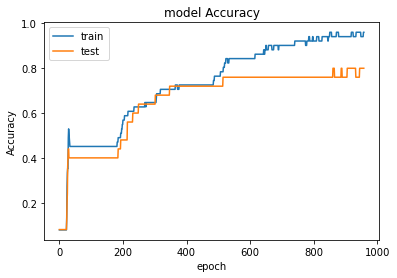

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [19]:
classifications = model.predict(X_test)

In [20]:
testweights = []
testprob = []
for i in range(0,p,1):
    if classifications[i,0] > classifications[i,1] and classifications[i,0] > classifications[i,2] and classifications[i,0] > classifications[i,3]:
        testweights.append('0')
        testprob.append(classifications[i,0])
    elif classifications[i,1] > classifications[i,2] and classifications[i,1] > classifications[i,3]:
        testweights.append('1')
        testprob.append(classifications[i,1])
    elif classifications[i,2] > classifications[i,3]:
        testweights.append('2')
        testprob.append(classifications[i,2])
    else:
        testweights.append('3')
        testprob.append(classifications[i,3])

In [21]:
#pip install openpyxl

In [24]:
df = pd.DataFrame() 
  
# Creating two columns 
df['Question'] = head
df['Prob'] = testprob
df['Difficulty'] = testweights 

# Converting to excel 
df.to_excel('result.xlsx', index = False)